<a href="https://colab.research.google.com/github/Mouryagundala/week1/blob/main/updatednotebooks_week1_%26_Week3_%26_Week5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import data_table
from IPython.display import display


In [4]:
import pandas as pd
df=pd.read_csv("/content/online_retail_II.csv", encoding='latin1')

Data Wrangling Part : Task 1

In [5]:
df.head()
df.tail()
df.shape

(334604, 9)

In [6]:
df.columns
df.info()
df.describe(include="object")


display(df.sample(10, random_state=42))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334604 entries, 0 to 334603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      334604 non-null  object 
 1   StockCode    334604 non-null  object 
 2   Description  332358 non-null  object 
 3   Quantity     334604 non-null  int64  
 4   InvoiceDate  334604 non-null  object 
 5   Price        334604 non-null  float64
 6   Customer ID  264015 non-null  float64
 7   Country      334604 non-null  object 
 8   Unnamed: 8   332357 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 23.0+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Unnamed: 8
35045,492313,21479,WHITE SKULL HOT WATER BOTTLE,2,16-12-2009 12:09,3.75,14680.0,United Kingdom,White Skull Hot Water Bottle
288572,C517470,20719,WOODLAND CHARLOTTE BAG,-3,29-07-2010 11:55,0.85,12472.0,Germany,Woodland Charlotte Bag
213545,510117,85232B,SET/3 RUSSIAN DOLL STACKING TINS,3,27-05-2010 11:52,4.95,13080.0,United Kingdom,Set/3 Russian Doll Stacking Tins
290161,517634,22055,MINI CAKE STAND HANGING STRAWBERY,1,30-07-2010 12:46,3.36,NaN,United Kingdom,Mini Cake Stand Hanging Strawbery
111101,500015,21500,PINK SPOTS WRAP,25,04-03-2010 10:31,0.42,17861.0,United Kingdom,Pink Spots Wrap
315777,520082,22083,PAPER CHAIN KIT RETRO SPOT,40,24-08-2010 10:41,2.55,17511.0,United Kingdom,Paper Chain Kit Retro Spot
148505,503541,20766,GARDEN PATH SKETCHBOOK,4,01-04-2010 14:18,3.75,14748.0,United Kingdom,Garden Path Sketchbook
231900,511852,22470,HEART OF WICKER LARGE,1,10-06-2010 20:09,2.95,16549.0,United Kingdom,Heart Of Wicker Large
22786,491159,21411,GINGHAM HEART DOORSTOP RED,16,10-12-2009 10:27,3.75,15311.0,United Kingdom,Gingham Heart Doorstop Red
27360,491698,21238,RED SPOTTY CUP,8,13-12-2009 13:31,0.85,12681.0,France,Red Spotty Cup


In the Online Retail dataset, a single row denotes a single invoice line item that corresponds to a particular product that was purchased as part of an invoice in a specific quantity at a specific price. The same invoice number may appear in more than one row.

because several products may be included in a single client transaction (basket).
Similar to this, as consumers may make more than one purchase over time, several rows may share the same CustomerID. Rows in this dataset are therefore not independent observations.


## Task 2 –  Analysis
### Invoice Line Level (Row-Level)

Several potential units of analysis are supported by the Online Retail dataset.
Different levels of aggregation offer distinct viewpoints on the data because each row

At the invoice line level, each row is treated as a separate observation.
This provides detailed information about individual products, including
quantities and prices. However, this level ignores the transactional structure
of the data, as multiple rows can belong to the same invoice and customer.
Treating rows as independent observations
## Customer Level

Data is combined from all invoices associated with the same CustomerID at the customer level. This makes it possible to analyse consumer behaviour, including long-term value, total spend, and frequency of purchases. Nevertheless, this method does not capture variance
### Decision
The customer level will serve as the main analytical unit for the analysis that follows. This decision is supported by the fact that later phases aim to comprehend consumer behaviour rather than specific product-level occurrences. A more suitable representation for behavioural analysis is produced by aggregating at the customer level, which also lessens dependency between rows.


## Task 3 – Data Quality and Validity Audit
Examining the Online Retail dataset revealed a number of problems with data validity and quality. These problems need to be handled carefully because they could compromise the accuracy of the analysis.
### 1. Missing Customer ID

Customer ID values are missing from a large number of rows. Because customer-level analysis depends on the capacity to uniquely identify customers, this is problematic. Rows lacking a Customer ID may skew customer behaviour analysis and cannot be accurately linked to a particular customer.

##Planned handling:
Customer ID values are missing from a large number of rows. Because customer-level analysis depends on the capacity to uniquely identify customers, this is problematic. Rows lacking a Customer ID may skew customer behaviour analysis and cannot be accurately linked to a particular customer.
##2. Negative Quantities (Returns)
Negative quantity values in some rows indicate returned goods rather than purchases. Directly incorporating these figures into revenue or sales computations would skew the results and possibly produce inaccurate conclusions.
##Planned handling:
Rows with negative quantities will be handled as returns and kept apart from purchase data. This preserves crucial data while enabling independent analysis of purchases and returns.
### 3. Cancelled Invoices
Cancelled transactions are indicated by invoices that begin with the letter "C." These invoices shouldn't be regarded as typical sales events since they don't match completed purchases.
##Planned handling:
To prevent inflating transaction counts or revenue figures, cancelled invoices will not be included in purchase-based analyses.
### 4. Extreme Values in Quantity and Price
Extreme quantity and price numbers in the dataset may indicate mass purchases, mistakes in data entry, or unique circumstances.
##Planned handling:
At first, extreme values will be kept, but during exploratory data analysis, they will be reviewed. Only when there is a clear justification will additional filtering be used.


In [7]:
df_clean = df.copy()
df_clean = df_clean[~df_clean["Invoice"].str.startswith("C")]
df_clean = df_clean[df_clean["Quantity"] > 0]
df_returns = df_clean[df_clean["Quantity"] < 0]
df_clean = df_clean[df_clean["Price"] > 0]
df_clean = df_clean[df_clean["Customer ID"].notna()]





In [8]:
df_clean.info()




<class 'pandas.core.frame.DataFrame'>
Index: 257182 entries, 0 to 334603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      257182 non-null  object 
 1   StockCode    257182 non-null  object 
 2   Description  257182 non-null  object 
 3   Quantity     257182 non-null  int64  
 4   InvoiceDate  257182 non-null  object 
 5   Price        257182 non-null  float64
 6   Customer ID  257182 non-null  float64
 7   Country      257182 non-null  object 
 8   Unnamed: 8   257181 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 19.6+ MB


In [9]:
print("Cancelled invoices left:",
      df_clean["Invoice"].str.startswith("C").any())

print("Negative quantities left:",
      (df_clean["Quantity"] < 0).any())

print("Negative prices left:",
      (df_clean["Price"] < 0).any())

print("Missing Customer IDs left:",
      df_clean["Customer ID"].isna().any())

Cancelled invoices left: False
Negative quantities left: False
Negative prices left: False
Missing Customer IDs left: False



Minimal data cleansing is the main emphasis of Task 4. Since cancelled invoices do not reflect completed transactions, they were eliminated. Negative amounts were used to identify returned objects, which were then treated independently. In order to prevent inaccurate revenue computations, negative pricing were eliminated. To guarantee accurate


For creating Scale ( Revenue)

In [10]:
df_clean["Sales"] = df_clean["Quantity"] * df_clean["Price"]


Overall Dataset Summary

In [11]:
df_clean.describe()


,Quantity,Price,Customer ID,Sales
count,257182.000000,257182.000000,257182.000000,257182.000000
mean,14.343492,3.360299,15340.141499,22.093789
std,109.332945,36.345367,1681.235412,71.546535
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,5.040000
50%,5.000000,1.950000,15271.000000,12.600000
75%,12.000000,3.750000,16798.000000,19.500000
max,19152.000000,10953.500000,18287.000000,10953.500000


Total Revenue

In [12]:
total_revenue = df_clean["Sales"].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 5682124.781000001


Top 10 Selling Products

In [13]:
top_products = (
    df_clean.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

,Quantity
Description,
PACK OF 72 RETRO SPOT CAKE CASES,41511
WHITE HANGING HEART T-LIGHT HOLDER,41339
WORLD WAR 2 GLIDERS ASSTD DESIGNS,33996
BROCADE RING PURSE,28670
60 TEATIME FAIRY CAKE CASES,27888
BLACK AND WHITE PAISLEY FLOWER MUG,25685
ASSORTED COLOUR BIRD ORNAMENT,24901
PACK OF 60 PINK PAISLEY CAKE CASES,22644
COLOUR GLASS T-LIGHT HOLDER HANGING,22044


Top 10 Countries by Revenue

In [14]:
top_countries = (
    df_clean.groupby("Country")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_countries

,Sales
Country,
United Kingdom,4746671.490
EIRE,248002.030
Netherlands,183964.380
Germany,132158.271
France,100459.450
Denmark,43391.540
Sweden,41173.270
Spain,23602.760
Switzerland,20426.220


Monthly Sales Trend

In [15]:
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"], format="%d-%m-%Y %H:%M")

df_clean["Month"] = df_clean["InvoiceDate"].dt.to_period("M")

monthly_sales = df_clean.groupby("Month")["Sales"].sum()

monthly_sales

,Sales
Month,
2009-12,686654.160
2010-01,557319.062
2010-02,506371.066
2010-03,699608.991
2010-04,594609.192
2010-05,599985.790
2010-06,639066.580
2010-07,591636.740
2010-08,604242.650


Top Customers by Revenue

In [16]:
top_customers = (
    df_clean.groupby("Customer ID")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers

,Sales
Customer ID,
18102.0,269041.67
14646.0,168648.65
14156.0,154877.15
13694.0,114527.41
14911.0,86795.96
17511.0,61806.32
15061.0,52028.15
16754.0,50926.81
15311.0,45396.61


##Exploratory Data Analysis
Exploratory Data Analysis was conducted on the cleansed dataset to understand sales
patterns and customer behaviour. A sales variable was created using quantity and
price. Key insights include the identification of top-selling products, top
revenue-generating countries, and high-value customers. Monthly sales trends were

##EDA output 1 - Temporal Pattern
#Question
How does total revenue change over time ?

*Answer

Monthly revenue clearly varies over time, reflecting shifts in the volume of sales in various months.


In [17]:
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])
df_clean["Month"] = df_clean["InvoiceDate"].dt.to_period("M")
monthly_revenue = df_clean.groupby("Month")["Sales"].sum()
monthly_revenue



,Sales
Month,
2009-12,686654.160
2010-01,557319.062
2010-02,506371.066
2010-03,699608.991
2010-04,594609.192
2010-05,599985.790
2010-06,639066.580
2010-07,591636.740
2010-08,604242.650


##Output 2 — Transactional Structure

#Question
What is the average basket size (number of items per invoice)?

*Answer

The majority of invoices have comparatively few items, indicating that most customer purchases are made in small baskets.

In [18]:
basket_size = (
    df_clean.groupby("Invoice")["Quantity"]
    .sum()
)

basket_size.describe()

,Quantity
count,12484.000000
mean,295.489266
std,1526.902598
min,1.000000
25%,70.000000
50%,148.000000
75%,284.000000
max,87167.000000


##Output 3 — Invoice Value
#Question
What is the distribution of invoice values?

*Answer

The majority of transactions have low invoice values, and there are a few high-value invoices. Invoice values are positively skewed.

In [19]:
invoice_value = (
    df_clean.groupby("Invoice")["Sales"]
    .sum()
)

invoice_value.describe()

,Sales
count,12484.000000
mean,455.152578
std,911.860725
min,0.840000
25%,156.732500
50%,302.905000
75%,478.600000
max,44051.600000


##Output 4 — Product Pattern
#Question
Which products are the top sellers by quantity?

*Answer

There is a concentration of demand when a small number of products make up a significant portion of all units sold.

In [20]:
top_products = (
    df_clean.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

,Quantity
Description,
PACK OF 72 RETRO SPOT CAKE CASES,41511
WHITE HANGING HEART T-LIGHT HOLDER,41339
WORLD WAR 2 GLIDERS ASSTD DESIGNS,33996
BROCADE RING PURSE,28670
60 TEATIME FAIRY CAKE CASES,27888
BLACK AND WHITE PAISLEY FLOWER MUG,25685
ASSORTED COLOUR BIRD ORNAMENT,24901
PACK OF 60 PINK PAISLEY CAKE CASES,22644
COLOUR GLASS T-LIGHT HOLDER HANGING,22044


##Output 5 — Country Pattern
#Question
Which countries contribute the most to total revenue?

*Answer

One nation accounts for the majority of sales, and revenue is concentrated in a small number of nations.

In [21]:
country_revenue = (
    df_clean.groupby("Country")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_revenue

,Sales
Country,
United Kingdom,4746671.490
EIRE,248002.030
Netherlands,183964.380
Germany,132158.271
France,100459.450
Denmark,43391.540
Sweden,41173.270
Spain,23602.760
Switzerland,20426.220


## Task 6: Reflection and Future Work
*Insights from the Analysis

Higher sales were seen near the end of the year, according to the exploratory data analysis, which showed distinct monthly variations in revenue. It was discovered that a small percentage of total revenue came from a few products and customers. When compared to other nations, the UK accounted for the majority of sales.

*Limitations

The dataset lacks client IDs and doesn't give clear explanations for transactions that were cancelled or returned. Furthermore, the analysis is restricted to a particular time frame, which can limit how broadly the results can be applied.

*Future Work

To gain a deeper understanding of consumer behaviour, future research may use basket analysis, customer segmentation, and predictive modelling. Additional data, such longer time periods or client



##Re-establishing the Modelling Dataset





In [22]:
#Group the data by the "Invoice" column
grouped = df_clean.groupby("Invoice")

# Define the calculations we want for each column
# We use a dictionary: {"Column Name": "Operation"}
calculations = {
    "Sales": "sum",
    "Quantity": "sum",
    "Description": "nunique",
    "Country": "first",
    "InvoiceDate": "first"
}

invoice_df = grouped.agg(calculations)

#Move "Invoice" from the index back to a regular column
invoice_df = invoice_df.reset_index()

#Renaming the columns so they make sense
invoice_df = invoice_df.rename(columns={
    "Sales": "invoice_value",
    "Quantity": "basket_size",
    "Description": "num_products",
    "InvoiceDate": "invoice_date"
})

# Ensure 'invoice_date' is datetime type before extracting month
invoice_df["invoice_date"] = pd.to_datetime(invoice_df["invoice_date"])

#Creating the month column
invoice_df["month"] = invoice_df["invoice_date"].dt.month

# See the result
print(invoice_df.head())

  Invoice  invoice_value  basket_size  num_products         Country  \
0  489434         505.30          166             8  United Kingdom   
1  489435         145.80           60             4  United Kingdom   
2  489436         630.33          193            19  United Kingdom   
3  489437         310.75          145            23  United Kingdom   
4  489438        2286.24          826            17  United Kingdom   

         invoice_date  month  
0 2009-12-01 07:45:00     12  
1 2009-12-01 07:46:00     12  
2 2009-12-01 09:06:00     12  
3 2009-12-01 09:08:00     12  
4 2009-12-01 09:24:00     12  


Each row in the modelling stage represents a single invoice that has been combined from several transactional line items. In order to prevent revenue from being counted twice and to guarantee the independence of observations, this unit of analysis was selected. However, aggregating at the invoice level removes detailed product-level information, which may limit fine-grained behavioural insights.

## Define the Target Variable

*How to define the target variable for modelling.

Used the median invoice value as a threshold to define a binary target that indicates whether an invoice is high-value

In [23]:
#Find the "middle" value
threshold = invoice_df["invoice_value"].median()
#Create a Logic Check
is_above_middle = invoice_df["invoice_value"] > threshold
#Convert True/False into Numbers
invoice_df["high_value_invoice"] = is_above_middle.astype(int)
#Count the results
print(invoice_df["high_value_invoice"].value_counts())

high_value_invoice
1    6242
0    6242
Name: count, dtype: int64


If an invoice's total sales value exceeds the median invoice value, it is considered high-value. This is indicated by the target variable. As a result, a binary classification task appropriate for tree-based models is created. The median is a practical but somewhat arbitrary threshold that could affect the balance of classes.

#Feature Construction

The goal is to construct a small set of meaningful, interpretable features that could reasonably help predict the target variable.

*Selected features

*basket_size

Total quantity of items in an invoice

Captures purchasing intensity

 *num_products

Number of unique products in an invoice

Captures basket diversity

 *month

Month of purchase

Captures temporal effects

 *country

Captures geographic differences in purchasing behaviour

In [24]:
#Selecting our "Ingredients"
columns_we_need = ["basket_size", "num_products", "month", "Country", "high_value_invoice"]
features_df = invoice_df[columns_we_need]
#Convert text to numbers (One-Hot Encoding)
features_df_encoded = pd.get_dummies(
    features_df,
    columns=["Country"],
    drop_first=True
)
print(features_df_encoded.head())

   basket_size  num_products  month  high_value_invoice  Country_Austria  \
0          166             8     12                   1            False   
1           60             4     12                   0            False   
2          193            19     12                   1            False   
3          145            23     12                   1            False   
4          826            17     12                   1            False   

   Country_Bahrain  Country_Belgium  Country_Channel Islands  Country_Cyprus  \
0            False            False                    False           False   
1            False            False                    False           False   
2            False            False                    False           False   
3            False            False                    False           False   
4            False            False                    False           False   

   Country_Denmark  ...  Country_Singapore  Country_Spain  Cou

In order to balance interpretability and predictive usefulness, a limited number of invoice-level features were chosen. Month and country account for temporal and geographical effects, while basket size and quantity of unique products capture purchasing intensity and diversity. While reducing the number of features makes the model less complex, it may also leave out fine-grained product-level information.

#Train Tree-Based Models

To train several tree-based models on the same features in order to compare how different levels of model complexity affect learning and generalisation.

#Train-test split

In [25]:
from sklearn.model_selection import train_test_split

X = features_df_encoded.drop('high_value_invoice', axis=1)
y = features_df_encoded['high_value_invoice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#Import models

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Train the models

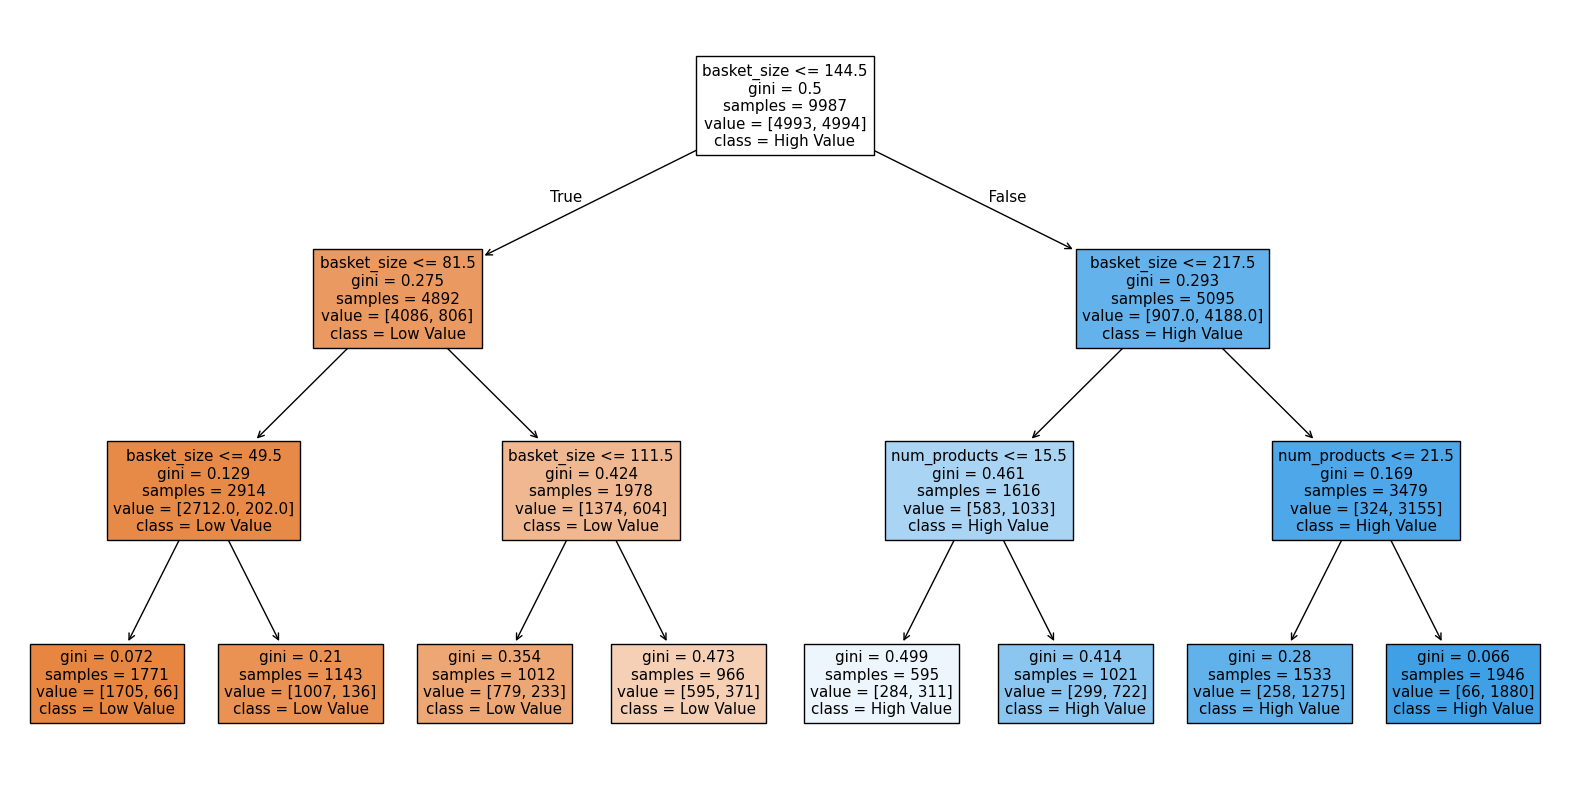

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Instantiate and train the models
dt = DecisionTreeClassifier(max_depth=3, random_state=42) # Limiting depth for plotting clarity
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Low Value", "High Value"],
    filled=True,
    max_depth=3
)
plt.show()

A decision tree, a random forest, and a gradient boosting classifier were the three tree-based models that were trained. From a single shallow tree to ensemble approaches, the model's complexity gradually increased. To lessen overfitting and concentrate on comprehending model behaviour rather than performance optimisation, limited tuning was used.

#Model Comparison & Validation

To assess how well various tree-based models perform on unobserved data and spot overfitting indicators in order to compare how well they generalise.

#Import evaluation tools

In [28]:
from sklearn.metrics import accuracy_score, classification_report

#Evaluate all models on TRAIN and TEST data

In [29]:
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

for name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Train Accuracy:", accuracy_score(y_train, train_pred))
    print("Test Accuracy :", accuracy_score(y_test, test_pred))


Decision Tree
Train Accuracy: 0.828477020126164
Test Accuracy : 0.8253904685622747

Random Forest
Train Accuracy: 0.9851807349554421
Test Accuracy : 0.815778934721666

Gradient Boosting
Train Accuracy: 0.8373886051867427
Test Accuracy : 0.8325991189427313


#Detailed report for best model

In [30]:
print(classification_report(y_test, rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1249
           1       0.81      0.82      0.82      1248

    accuracy                           0.82      2497
   macro avg       0.82      0.82      0.82      2497
weighted avg       0.82      0.82      0.82      2497



#Training vs Testing Performance Analysis

The models' capacity to generalise to new data was assessed by comparing training and testing accuracy.


On the training data, the decision tree performed well; but, on the test data, its performance clearly declined. Given that the model acquired training set-specific patterns that did not generalise well, this suggests overfitting.

The training and testing accuracy differences were less pronounced in the random forest.Because averaging over several trees lowers variance and restricts overfitting, this predicts better generalisation.

With test results that were comparable to those of the random forest, the gradient boosting model demonstrated excellent training performance. It is still susceptible to model complexity and parameter selections even though it generalised more well than the single decision tree.

In general, ensemble models outperformed decision trees in terms of dependable generalisation. The greatest consistent balance between training and testing performance was offered by the random forest.


#Final Test-Set Evaluation & Reflection

The random forest model was chosen for the final assessment based on validation results because of its consistent generalisation performance. To get an objective assessment of the model's performance, the test set was utilised just once.  Results from the test set were in line with previous findings, suggesting that the model does a fair job of generalising to new data. Since comprehending model behaviour rather than optimisation was the main objective, performance differences between models were not overinterpreted.  All things considered, this assessment demonstrates that ensemble approaches offer more trustworthy generalisation for this task than a single decision tree.

##Week 5 Task

#Customer-Level Feature

In [31]:
# Create customer-level dataset

customer_df = df_clean.groupby("Customer ID").agg({
    "Sales": "sum",          # Total revenue per customer
    "Invoice": "nunique",    # Number of unique invoices
    "Quantity": "sum"        # Total quantity purchased
})

customer_df.columns = ["TotalRevenue", "NumInvoices", "TotalQuantity"]

customer_df.head()

,TotalRevenue,NumInvoices,TotalQuantity
Customer ID,,,
12346.0,372.86,11,70
12349.0,1268.52,2,474
12355.0,488.21,1,303
12358.0,1697.93,2,590
12359.0,2012.03,5,877


In [32]:
# Calculate Recency

latest_date = df_clean["InvoiceDate"].max()

recency = df_clean.groupby("Customer ID")["InvoiceDate"].max()
recency = (latest_date - recency).dt.days

customer_df["Recency"] = recency

customer_df.head()

,TotalRevenue,NumInvoices,TotalQuantity,Recency
Customer ID,,,,
12346.0,372.86,11,70,74
12349.0,1268.52,2,474,115
12355.0,488.21,1,303,112
12358.0,1697.93,2,590,95
12359.0,2012.03,5,877,80


#Scale the Data

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df)

#K-MEANS

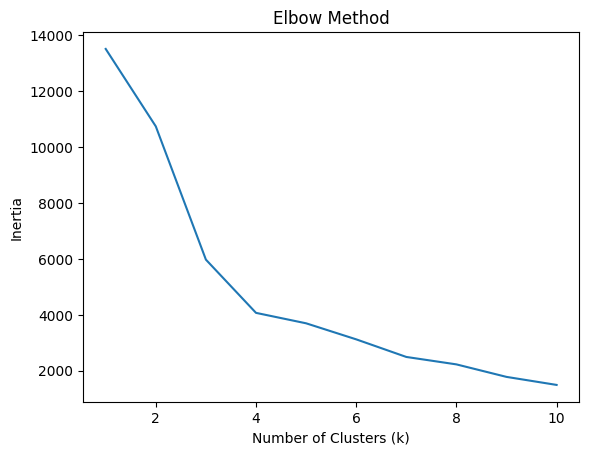

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

#Fitting KMeans With Chosen K

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

customer_df["Cluster"] = clusters

##Cluster Interpretation

In [36]:
customer_df.groupby("Cluster").mean()

,TotalRevenue,NumInvoices,TotalQuantity,Recency
Cluster,,,,
0,526.513889,1.545673,282.250000,179.298077
1,1976.942698,4.780499,1250.343853,42.393311
2,137997.683333,67.666667,113693.333333,32.833333


#PCA

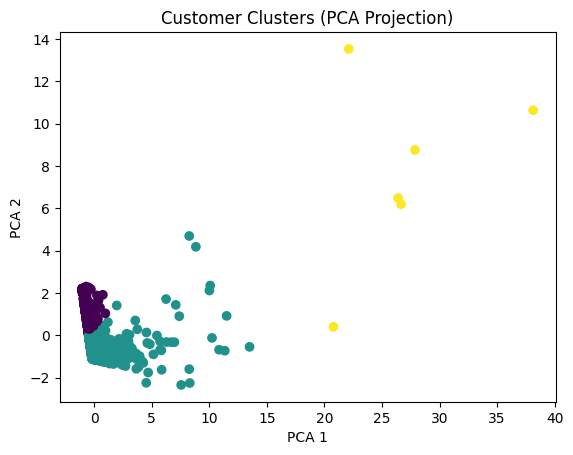

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.scatter(pca_components[:,0], pca_components[:,1], c=clusters)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Clusters (PCA Projection)")
plt.show()

In [38]:
cluster_summary = customer_df.groupby("Cluster")[["TotalRevenue", "NumInvoices", "TotalQuantity", "Recency"]].mean()
print(cluster_summary)
cluster_names = {
    0: "Regular Active Customers",
    1: "At-Risk Customers",
    2: "High-Value VIP Customers"
}

customer_df["Segment"] = customer_df["Cluster"].map(cluster_names)

          TotalRevenue  NumInvoices  TotalQuantity     Recency
Cluster                                                       
0           526.513889     1.545673     282.250000  179.298077
1          1976.942698     4.780499    1250.343853   42.393311
2        137997.683333    67.666667  113693.333333   32.833333


Three distinct customer segments were found by the clustering analysis. The "High-Value VIP Customers" segment suggests wholesale or extremely devoted customers because of its disproportionately high revenue and extremely high purchase frequency. The segment known as "Regular Active Customers" exhibits moderate levels of engagement and revenue. Low spending and high recency values in the "At-Risk Customers" segment suggest lower engagement and possible churn risk.

The fact that revenue is heavily concentrated in the High-Value VIP segment is a particularly significant finding. Despite probably making up a small percentage of the clientele, this group makes a disproportionate amount of the total revenue.

In [40]:
segment_revenue = customer_df.groupby("Cluster")["TotalRevenue"].sum()
segment_percentage = ((segment_revenue / segment_revenue.sum()) * 100).round(2)

segment_percentage

,TotalRevenue
Cluster,
0,11.56
1,73.86
2,14.57


#Cluster Quality

In [41]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", round(sil_score, 3))

Silhouette Score: 0.475


The K-Means model appears to have successfully identified significant customer segments, as indicated by the silhouette score of 0.562, which indicates a reasonably strong cluster separation.